## **EDA & Data Preprocessing on Google App Store Rating Dataset.**

  ##  **1. Import required libraries and read the dataset.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings(action='ignore')

#all needed libraries are imported

In [2]:
data = pd.read_csv("Apps_data+(1).csv")
data
#dataset readed

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


   ## **2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
data.shape

(10841, 13)

In [5]:
data.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8885,MasterDT,SPORTS,NaN,24,4.1M,100+,Free,0,Everyone,Sports,"June 30, 2018",4.1,4.0.3 and up
3219,Ascape VR: 360° Virtual Travel,TRAVEL_AND_LOCAL,4.1,890,7.6M,"100,000+",Free,0,Everyone,Travel & Local;Action & Adventure,"August 9, 2017",4.0.38,4.4 and up
7854,Philips IQon Spectral CT Fundamentals.,MEDICAL,NaN,2,77M,100+,Free,0,Everyone,Medical,"September 21, 2017",1.0.0,4.0 and up
9129,DZ Fly Algérie Horaire Vols,TRAVEL_AND_LOCAL,3.6,114,10M,"10,000+",Free,0,Everyone,Travel & Local,"October 31, 2016",2.0,4.0 and up
8876,DT Freight,PRODUCTIVITY,NaN,0,54M,1+,Free,0,Everyone,Productivity,"November 29, 2017",8.0,4.0.3 and up


In [6]:
data.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
data.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


  ## **3. Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.**

In [8]:
numerical_summary = data.describe().T
numerical_summary

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


In [9]:
categorical_summary = data.describe(include=['object']).T
categorical_summary

#both object and numerical summeries finded

,count,unique,top,freq
App,10841,9660,ROBLOX,9
Category,10841,34,FAMILY,1972
Reviews,10841,6002,0,596
Size,10841,462,Varies with device,1695
Installs,10841,22,"1,000,000+",1579
Type,10840,3,Free,10039
Price,10841,93,0,10040
Content Rating,10840,6,Everyone,8714
Genres,10841,120,Tools,842
Last Updated,10841,1378,"August 3, 2018",326


In [10]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

  ## **4. Check if there are any duplicate records in the dataset? if any drop them.**

In [11]:
data.shape
#cheching the shape of the dataset before removing the duplicate records

(10841, 13)

In [12]:
data[data['App'].isin(data['App'])].sort_values(by = 'App')

#using the app column for duplicate removing becouse the app column is the main data source. sorted the app column 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [13]:
data.drop_duplicates('App', inplace = True)
#duplicated values are removed

In [14]:
data['App'].value_counts().head()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
Name: App, dtype: int64

In [15]:
data.shape

(9660, 13)

   ## **5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.**

In [16]:
data['Category'].value_counts()
#checking the values count for categories column

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [17]:
data_invalid_category = data[data["Category"] == "1.9"]
data_invalid_category
#invalid value 1.9 removed

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [18]:
data = data.drop(data[data['Category'] == '1.9'].index)

  ## **6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)**

In [19]:
# Checking for missing values in the 'Rating' column
missing_values = data['Rating'].isnull().sum()
print("Number of missing values in 'Rating' column is:", missing_values)

Number of missing values in 'Rating' column is: 1463


In [20]:
if missing_values > 0:
    data.dropna(subset=['Rating'], inplace=True)
    print("Missing values in 'Rating' column dropped successfully.")
else:
    print("No missing values found in 'Rating' column.")
    


Missing values in 'Rating' column dropped successfully.


In [21]:
missing_values = data['Rating'].isnull().sum()
print("Number of missing values in 'Rating' column is:", missing_values)

#missing values are removed

Number of missing values in 'Rating' column is: 0


In [22]:
data['Rating_category'] = data['Rating'].apply(lambda x: 'High' if x > 3.5 else 'Low')
data.head(4)
#separating rating column value is above 3.5 is High and below 3.5 is low 
#The newly created column 'Rating_category' is having 8013 higher values and 880 lower values,it distribtes more high and few low values only

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,High
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,High
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,High


In [23]:
data.dropna(inplace = True)
#droping all the m issing values

In [24]:
data.isnull().sum()

App                0
Category           0
Rating             0
Reviews            0
Size               0
Installs           0
Type               0
Price              0
Content Rating     0
Genres             0
Last Updated       0
Current Ver        0
Android Ver        0
Rating_category    0
dtype: int64

  ## **7. Check the distribution of the newly created column 'Rating_category' and comment on the distribution**

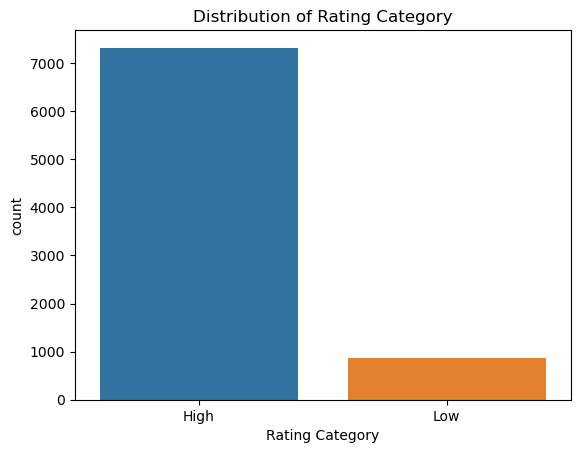

In [25]:
sns.countplot(data=data, x='Rating_category')
plt.xlabel('Rating Category')
plt.ylabel('count')
plt.title('Distribution of Rating Category')
plt.show()
#Check the distribution of the newly created column 'Rating_category' using count plot

In [26]:
data['Rating_category'].value_counts() / 100
# high and low value percentage checking

High    73.17
Low      8.73
Name: Rating_category, dtype: float64

  ## **8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)**

In [27]:
data['Reviews'] = pd.to_numeric(data['Reviews'], errors='coerce')
print(data['Reviews'].dtype)

int64


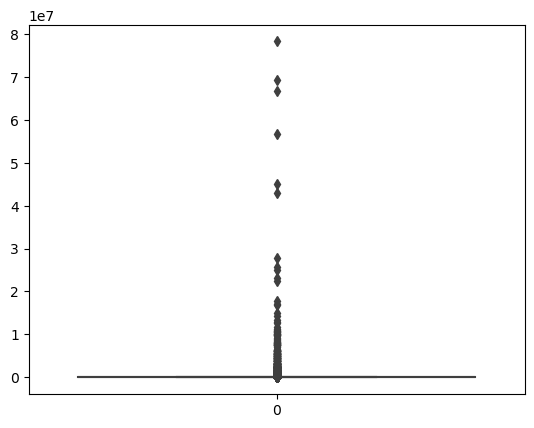

In [28]:
sns.boxplot(data['Reviews'])
plt.show()

In [29]:
data['Reviews'] = np.log(data['Reviews'])

After removing outliers 


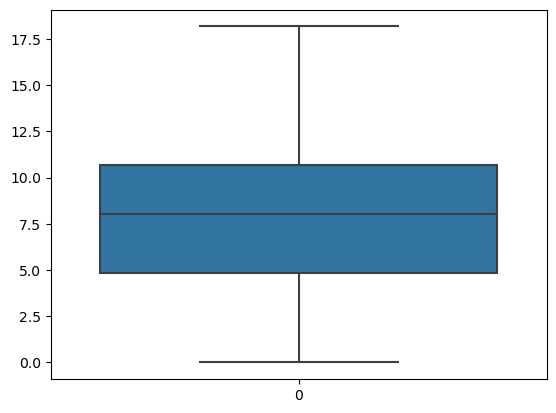

In [30]:
print('After removing outliers ')
sns.boxplot(data['Reviews'])
plt.show()
#removing the outliears using the log transformation

## **9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column intosuitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries wheresize='Varies with device')**

In [31]:
def calculate_size(val):
    if 'K' in val:
        val = val.replace('K','')
        return float(val)*1000
    elif 'M' in val:
        val = val.replace('M','')
        return float(val)*1000000
    else:
        return np.nan
#changing the m value *100000
# and k value *1000

In [32]:
data['Size'] = data['Size'].apply(calculate_size)
data['Size']

0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10834     2600000.0
10836    53000000.0
10837     3600000.0
10839           NaN
10840    19000000.0
Name: Size, Length: 8190, dtype: float64

In [33]:
data = data.drop(data[data['Size'] == 'Varies with device'].index)

In [34]:
data['Size'].head()

0    19000000.0
1    14000000.0
2     8700000.0
3    25000000.0
4     2800000.0
Name: Size, dtype: float64

## **10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.**

In [35]:
#removing the unwanted characters and data types
data['Installs'] = data['Installs'].str.replace(",","").str.replace("+","")
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8190, dtype: object

In [36]:
data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce')
data['Installs']

0           10000
1          500000
2         5000000
3        50000000
4          100000
           ...   
10834         500
10836        5000
10837         100
10839        1000
10840    10000000
Name: Installs, Length: 8190, dtype: int64

## **11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.**

In [37]:
data['Price'] = data['Price'].str.replace("$","")
#removing the unwanted characters and data types

In [38]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Price']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
10834    0.0
10836    0.0
10837    0.0
10839    0.0
10840    0.0
Name: Price, Length: 8190, dtype: float64

In [39]:
data['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

## **12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)**

In [40]:
data['Rating_category'] = data['Rating_category'].apply(lambda x: 1 if x == 'High' else 0)
#converting the Rating_category column into hig as 1 low as 0

In [41]:
data = data.drop(['App','Rating','Genres','Last Updated', 'Current Ver','Android Ver' ], axis = 1)
#droping above the columns

In [42]:
data.head(4)

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.068904,19000000.0,10000,Free,0.0,Everyone,1
1,ART_AND_DESIGN,6.874198,14000000.0,500000,Free,0.0,Everyone,1
2,ART_AND_DESIGN,11.379508,8700000.0,5000000,Free,0.0,Everyone,1
3,ART_AND_DESIGN,12.281384,25000000.0,50000000,Free,0.0,Teen,1


## **13. Encode the categorical columns.**

In [43]:
data = pd.get_dummies(data, columns=['Type','Content Rating','Category'],drop_first=0)
#get dummies and conver into 0's and 1's

In [44]:
data.head(4)

,Reviews,Size,Installs,Price,Rating_category,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
0,5.068904,19000000.0,10000,0.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,6.874198,14000000.0,500000,0.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,11.379508,8700000.0,5000000,0.0,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,12.281384,25000000.0,50000000,0.0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## **14. Segregate the target and independent features (Hint: Use Rating_category as the target)**

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 10840
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Reviews                         8190 non-null   float64
 1   Size                            6766 non-null   float64
 2   Installs                        8190 non-null   int64  
 3   Price                           8190 non-null   float64
 4   Rating_category                 8190 non-null   int64  
 5   Type_Free                       8190 non-null   uint8  
 6   Type_Paid                       8190 non-null   uint8  
 7   Content Rating_Adults only 18+  8190 non-null   uint8  
 8   Content Rating_Everyone         8190 non-null   uint8  
 9   Content Rating_Everyone 10+     8190 non-null   uint8  
 10  Content Rating_Mature 17+       8190 non-null   uint8  
 11  Content Rating_Teen             8190 non-null   uint8  
 12  Content Rating_Unrated          8

In [46]:
X = data.drop(columns='Rating_category')
y = data['Rating_category']
#temprorily remove the rating _ category and assing the droped data into the y variable

## **15. Split the dataset into train and test.**

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state = 1)
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)
#spinting the train and test as X and y ,

(5733, 45) (2457, 45)
(5733,) (2457,)


## **16. Standardize the data, so that the values are within a particular range. Proprietary**

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#using minmax scaler for standerdization

In [49]:
X_test.head()

,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
5618,13.856495,50000000.0,10000000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5560,10.134401,21000000.0,1000000,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4495,8.016648,NaN,500000,0.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
7966,4.382027,2200000.0,10000,0.0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
10791,7.160069,38000000.0,50000,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
X_train.head()

,Reviews,Size,Installs,Price,Type_Free,Type_Paid,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,...,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER
539,6.282267,28000000.0,100000,0.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
912,12.868990,NaN,10000000,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9160,12.021254,19000000.0,5000000,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5745,2.197225,17000000.0,500,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3335,9.660970,18000000.0,1000000,0.0,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
